# Ad Budget Allocation Problem

## Problem Overview
We have a total budget of $200,000 that needs to be allocated across various advertising channels: Google (Cross-network, Display Network, Search Network), Microsoft (Search & Content, Shopping), and Meta (general, without specific campaign types). The goal is to maximize the return on Inverstment (ROI) while ensuring efficient use of the budget across all channels.

### Data Provided:
1. **Ad Performance Data**: Includes metrics like impressions, clicks, conversions, cost, and revenue for different campaigns across Google, Microsoft, and Meta.
2. **Landing Website Data**: Contains user interaction data, which could be used to analyze conversion rates, user journey, and other relevant metrics.

### **Solution Approach**

#### 1. **Initial Analysis**:
- **Data Processing and Cleaning**: The dataset is first cleaned by removing any null or inconsistent values, and touchpoint data is sorted by user and timestamp to ensure that the sequence of interactions is preserved.
- **Calculate Key Metrics**: Compute key metrics such as:
  - **Cost per Click (CPC)**: \(\text{CPC} = \frac{\text{Cost}}{\text{Clicks}}\)
  - **Click-Through Rate (CTR)**: \(\text{CTR} = \frac{\text{Clicks}}{\text{Impressions}} \times 100\%\)
  - **Conversion Rate**: \(\text{Conversion Rate} = \frac{\text{Conversions}}{\text{Clicks}} \times 100\%\)
  - **Return on Investment (ROI)**: \(\text{ROAS} = \frac{\text{Revenue}}{\text{Cost}}\)
- **Evaluate Campaign Performance**: Assess the performance of each campaign type using ROAS and conversion rates. Identify high and low-performing campaigns based on their effectiveness in driving revenue and conversions.

#### 2. **Credit Distribution with Decay** (Credit Score Creation):
- **Conversion Occurred**: For each user journey with a conversion, all touchpoints up to the conversion point are given credit. A **decay factor** is applied, where recent touchpoints are weighted more heavily, and earlier touchpoints receive progressively less credit.
- **No Conversion**: For journeys without a conversion, minimal credit (0.1) is assigned to each touchpoint.
- **Credit Score Creation**: After applying decay to the touchpoints, a new feature, **credit score**, is added to the dataset. This score reflects the weighted impact of each campaign type within the user's journey, taking into account the recency of the touchpoints and whether or not a conversion occurred.

#### 3. **Monte Carlo Optimization**:
- **Define Parameters**: The credit scores, along with ROAS, CPC, and conversion rates, are used as input parameters for the Monte Carlo simulation.
- **Simulate Budget Allocations**: Thousands of random budget allocation scenarios are generated across the campaigns.
- **Evaluate Scenarios**: Each scenario is evaluated based on expected returns, using the credit scores to reflect campaign effectiveness.
- **Select Optimal Allocation**: The best scenario, which maximizes expected revenue or conversions, is selected for final budget distribution.

#### 4. **Final Budget Allocation**:
- **Implement the Optimal Allocation**: Based on the Monte Carlo simulation results, the $200,000 budget is allocated across Google, Microsoft, and Meta campaigns in a way that maximizes ROI or conversions.


## Conclusion
We Use AutoEncoder to eliminate the preprocesing step
By leveraging Monte Carlo optimization, we can make data-driven decisions to efficiently allocate the advertising budget, accounting for uncertainty and maximizing potential returns across all ad channels.


# Libraries Used

1. **pandas** - Version: `1.5.3`
   - **Description**: A powerful data analysis and manipulation library that is essential for handling structured data in Python.

2. **numpy** - Version: `1.24.3`
   - **Description**: A fundamental package for numerical computation in Python, providing support for arrays and matrices, along with a large collection of mathematical functions.

3. **matplotlib** - Version: `3.7.2`
   - **Description**: A plotting library for creating static, animated, and interactive visualizations in Python.

4. **seaborn** - Version: `0.12.2`
   - **Description**: A statistical data visualization library built on top of matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.

5. **scipy** - Version: `1.11.1`
   - **Description**: A library used for scientific and technical computing, which builds on numpy and provides a range of additional tools for optimization, integration, and statistics.

6. **scikit-learn** - Version: `1.3.1`
   - **Description**: A library for machine learning in Python, providing simple and efficient tools for data mining and data analysis.

7. **statsmodels** - Version: `0.14.0`
   - **Description**: A library that provides classes and functions for the estimation of many different statistical models, as well as conducting statistical tests and statistical data exploration.

8. **jupyter** - Version: `1.0.0`
   - **Description**: An open-source web application that allows you to create and share documents that contain live code, equations, visualizations, and narrative text.

9. **numpy-financial** - Version: `1.0.0`
   - **Description**: A library for performing financial calculations, such as calculating the internal rate of return, net present value, and other financial metrics.

10. **monte-carlo** - Version: `0.2.1`
    - **Description**: A library specifically for Monte Carlo simulations, providing a simple and flexible way to model and optimize stochastic processes.

11. **plotly** - Version: `5.17.0`
    - **Description**: An interactive graphing library that makes interactive, publication-quality graphs online. It's great for creating dashboards and sharing visualizations.

---

These libraries provide a comprehensive set of tools for data analysis, visualization, and optimization, making them ideal for a project like ad budget allocation.


# Approach and Methodology

## 1. Data Processing

### **Data Cleaning**:
- **Missing Values**: Checked for any missing or null values in the datasets and handled them by either filling with appropriate values or excluding those rows/columns.
- **Data Type Conversion**: Ensured that all relevant fields (such as dates, costs, clicks, conversions) were correctly formatted. For example, date fields were converted to `datetime` objects, and numerical fields were cast to appropriate types like `float` or `int`.
- **Data Merging**: Merged different datasets (e.g., performance data from Google, Microsoft, and Meta) into a single unified dataset to facilitate comparative analysis.

### **Preprocessing**:
- **Feature Engineering**: Created additional features like `Cost per Conversion`, `Conversion Rate`,`Revenue per Click`,`Credit Score`-from Website landing to enhance the analysis.
- **Aggregating Data**: Summarized data by campaign type, platform, and other relevant dimensions to simplify the analysis and focus on key metrics like ROI.
- **Normalization**: Normalized certain metrics where necessary to ensure comparability across different campaigns and platforms.

## 2. Algorithm

### **Monte Carlo Optimization**:

**Objective**: To allocate the $200,000 budget across various advertising channels to maximize the total expected return on ad spend (ROI).

### **Steps**:

1. **Parameter Initialization**:
   - **Input Parameters**: Used key metrics like ROI, conversion rates, CPC,Credit Score and total budget.
   - **Budget Constraints**: Defined the minimum and maximum allowable budget for each channel or campaign type.

2. **Scenario Generation**:
   - **Random Sampling**: Generated thousands of possible budget allocations by randomly assigning different proportions of the budget to each channel/campaign.
   - **Performance Estimation**: For each budget allocation, estimated the expected returns using the ROAS and conversion rates for each channel.

3. **Evaluation**:
   - **Metric Calculation**: For each scenario, calculated the total conversions, total revenue, and overall ROI.
   - **Optimization Criterion**: Selected the budget allocation scenario that maximized the total expected revenue or achieved a desired balance between conversions and cost.

4. **Budget Allocation**:
   - **Final Allocation**: Based on the best-performing scenario, allocated the $200,000 budget across Google, Microsoft, and Meta campaigns.

### **Mathematical Formulas**:

- **ROI Calculation**:
  \[
  \text{ROI} = \frac{\text{Total Revenue}}{\text{Total Ad Spend}}
  \]

- **Expected Return for Each Scenario**:
  \[
  \text{Expected Revenue} = \sum_{i=1}^{n} \left(\text{Allocated Budget}_i \times \text{ROAS}_i\right)
  \]
  Where \( i \) represents each channel/campaign type.

## 3. Assumptions

- **Constant ROI**: Assumed that the ROI for each campaign remains constant regardless of the budget allocation, which may not hold true in real-world scenarios where increasing spend can lead to diminishing returns.
- **Independence of Channels**: Assumed that the performance of one channel does not affect another, though in practice, channels can have synergistic effects.
- **Data Accuracy**: Assumed that the historical data provided is accurate and representative of future performance.
- **Fixed Budget**: The total budget of $200,000 is fixed and non-negotiable, with no overspending allowed.
- **No Cross-Platform Dependencies**: Assumed that campaigns on different platforms do not interact or influence each other's performance (e.g., brand awareness from one platform affecting another).

---


In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

## choose type of data set

In [120]:
df=pd.read_csv('googlead-performance.csv')

In [121]:
df.describe()

,Impressions,Clicks,Cost,Conversions,Revenue
count,470.000000,470.000000,470.000000,470.000000,470.000000
mean,83660.123404,1283.489362,1055.711702,76.038298,11733.801489
std,104072.597175,1132.614988,835.493118,54.224895,7871.955734
min,800.000000,29.000000,4.600000,0.000000,0.000000
25%,5074.750000,668.500000,553.350000,43.200000,6980.750000
50%,8438.500000,867.000000,907.200000,73.250000,12625.800000
75%,181967.750000,2072.500000,1549.275000,112.250000,16930.125000
max,502368.000000,13429.000000,3646.400000,213.900000,33528.200000


In [122]:
df['profit']=df['Revenue']-df['Cost']

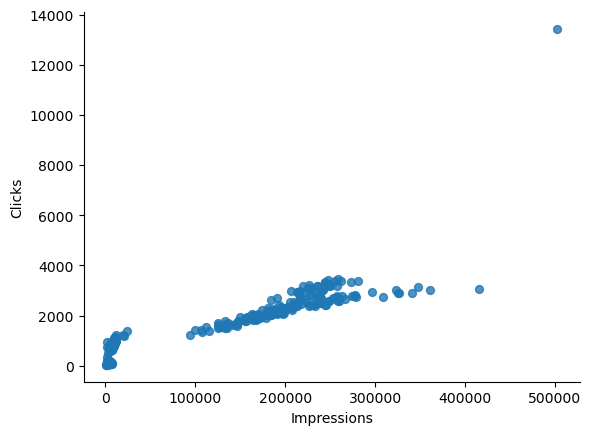

In [123]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Impressions', y='Clicks', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

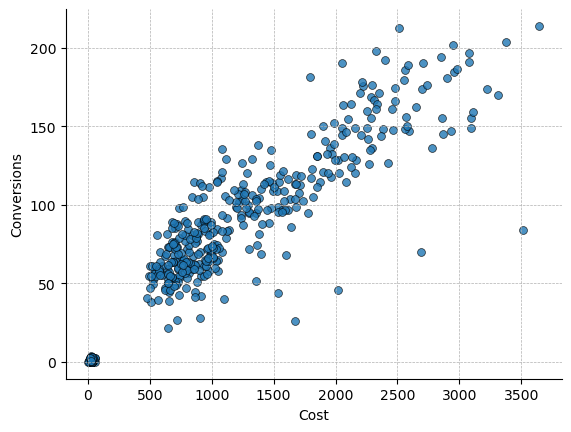

In [124]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Cost', y='Conversions', s=32, alpha=.8,edgecolor='black',linewidth=0.5)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.grid(True, which='both', linestyle='--', linewidth=0.5) 

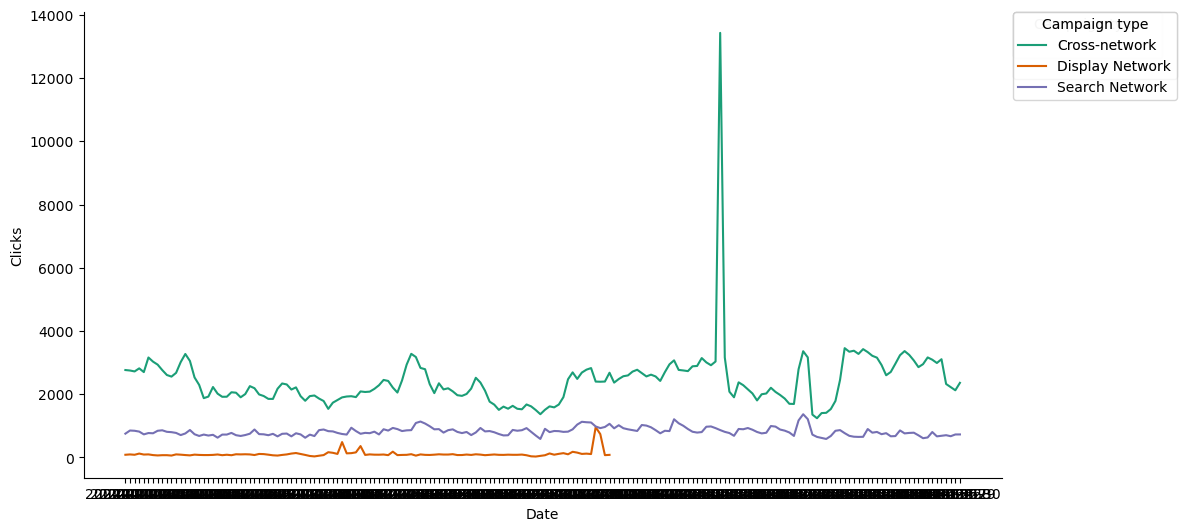

In [125]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Clicks']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Campaign type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Campaign type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Clicks')

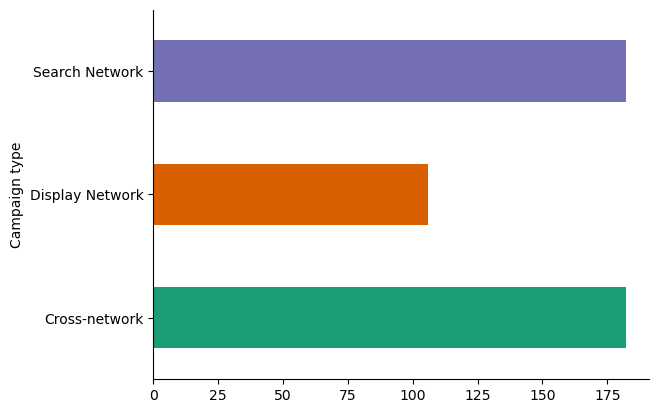

In [126]:
df.groupby('Campaign type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [127]:
df.isnull().sum()

Date             0
Campaign type    0
Impressions      0
Clicks           0
Cost             0
Conversions      0
Revenue          0
profit           0
dtype: int64

In [128]:
df.duplicated().sum()

0

In [129]:
df['Date'] = pd.to_datetime(df['Date'])
df['month']=df['Date'].dt.month

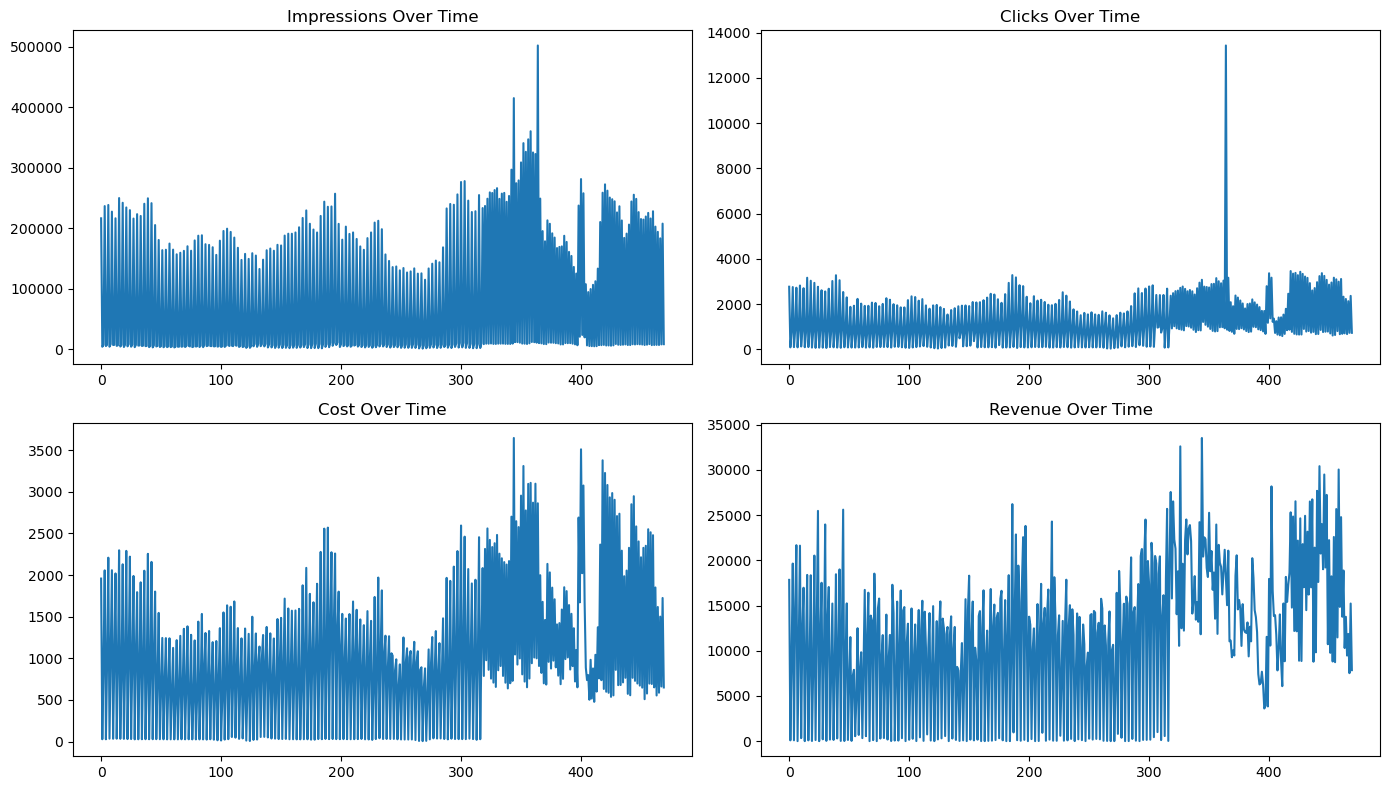

In [130]:
def plot_trends(df):
    plt.figure(figsize=(14, 8))
    plt.subplot(2, 2, 1)
    df['Impressions'].plot(title='Impressions Over Time')
    plt.subplot(2, 2, 2)
    df['Clicks'].plot(title='Clicks Over Time')
    plt.subplot(2, 2, 3)
    df['Cost'].plot(title='Cost Over Time')
    plt.subplot(2, 2, 4)
    df['Revenue'].plot(title='Revenue Over Time')
    plt.tight_layout()
    plt.show()

plot_trends(df)

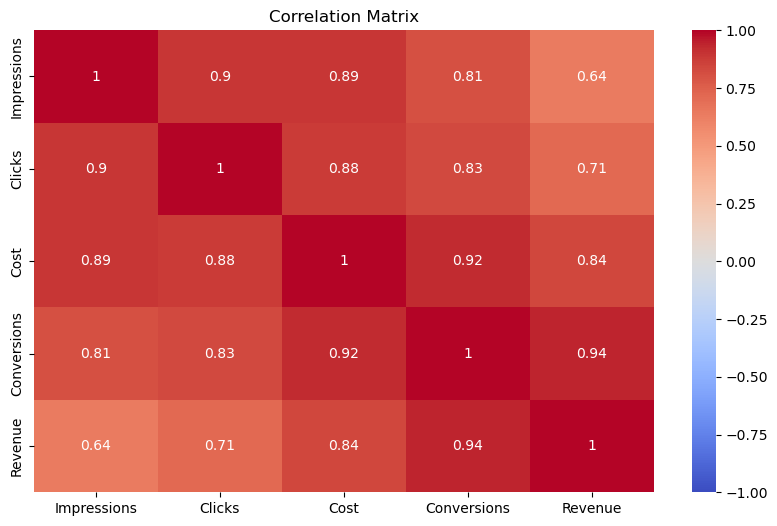

In [131]:
def plot_correlation_matrix(df):
    corr = df[['Impressions', 'Clicks', 'Cost', 'Conversions', 'Revenue']].corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()

plot_correlation_matrix(df)

In [132]:
aggregated_data = df.groupby(['Campaign type']).agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Cost': 'sum',
    'Conversions': 'sum',
    'Revenue': 'sum',


}).reset_index()

In [133]:
aggregated_data

,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
0,Cross-network,37580588.0,441745.0,343674.0,23165.9,3166297.3
1,Display Network,353827.0,11865.0,2951.7,108.1,18460.4
2,Search Network,1385843.0,149630.0,149558.8,12464.0,2330129.0


In [134]:
aggregated_data['Profit']=aggregated_data['Revenue']-aggregated_data['Cost']

In [135]:
aggregated_data['ROI'] = (aggregated_data['Profit'] / aggregated_data['Cost']) * 100

In [136]:
aggregated_data.to_csv('googlebudget_data.csv', index=False)

In [137]:
df=pd.read_csv('microsoftads-performance.csv')

In [138]:
df.isnull().sum()

Date             0
Campaign type    0
Impressions      0
Clicks           0
Cost             0
Conversions      0
Revenue          0
dtype: int64

In [139]:
df.duplicated().sum()

0

In [140]:
df.describe()

,Impressions,Clicks,Cost,Conversions,Revenue
count,364.000000,364.000000,364.000000,364.000000,364.000000
mean,10195.065934,180.445055,139.566209,12.445055,1983.526923
std,11446.766359,102.783571,85.522881,6.715366,1725.411177
min,87.000000,4.000000,9.000000,0.000000,0.000000
25%,763.750000,117.000000,99.900000,8.000000,769.450000
50%,6271.000000,160.000000,126.450000,12.000000,1500.150000
75%,17203.250000,229.250000,165.925000,16.000000,2698.400000
max,63625.000000,675.000000,701.500000,38.000000,10654.100000


In [141]:
df['Date'] = pd.to_datetime(df['Date'])

In [142]:
df['profit']=df['Revenue']-df['Cost']

In [143]:
df['month']=df['Date'].dt.month
df=df.drop('Date',axis=1)

In [144]:
df

,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue,profit,month
0,Search & content,831.0,100.0,108.6,15.0,2240.6,2132.0,1
1,Shopping,20128.0,316.0,149.0,13.0,2364.3,2215.3,1
2,Search & content,1069.0,163.0,188.4,26.0,4383.0,4194.6,1
3,Shopping,31540.0,366.0,166.9,11.0,423.6,256.7,1
4,Search & content,960.0,153.0,180.7,22.0,3035.6,2854.9,1
...,...,...,...,...,...,...,...,...
359,Shopping,15266.0,229.0,129.9,8.0,2522.0,2392.1,6
360,Search & content,365.0,87.0,133.7,15.0,4178.8,4045.1,6
361,Shopping,14916.0,247.0,129.4,10.0,1239.9,1110.5,6
362,Search & content,303.0,69.0,99.2,11.0,1721.7,1622.5,6


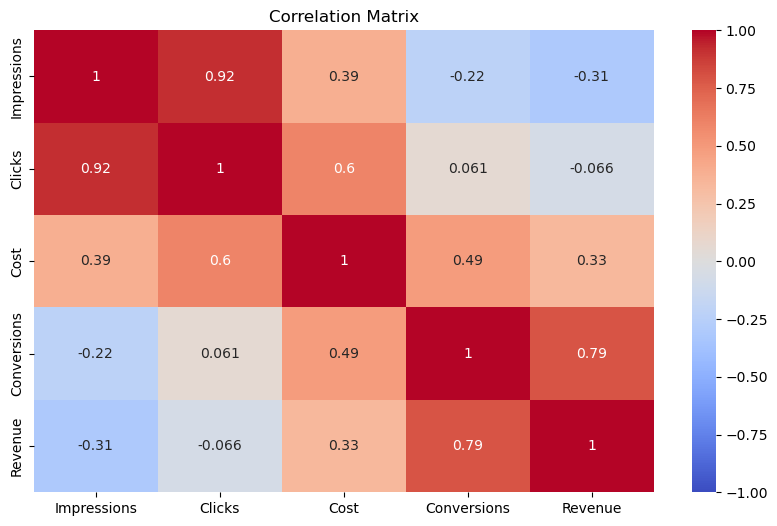

In [145]:
def plot_correlation_matrix(df):
    corr = df[['Impressions', 'Clicks', 'Cost', 'Conversions', 'Revenue']].corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()

plot_correlation_matrix(df)

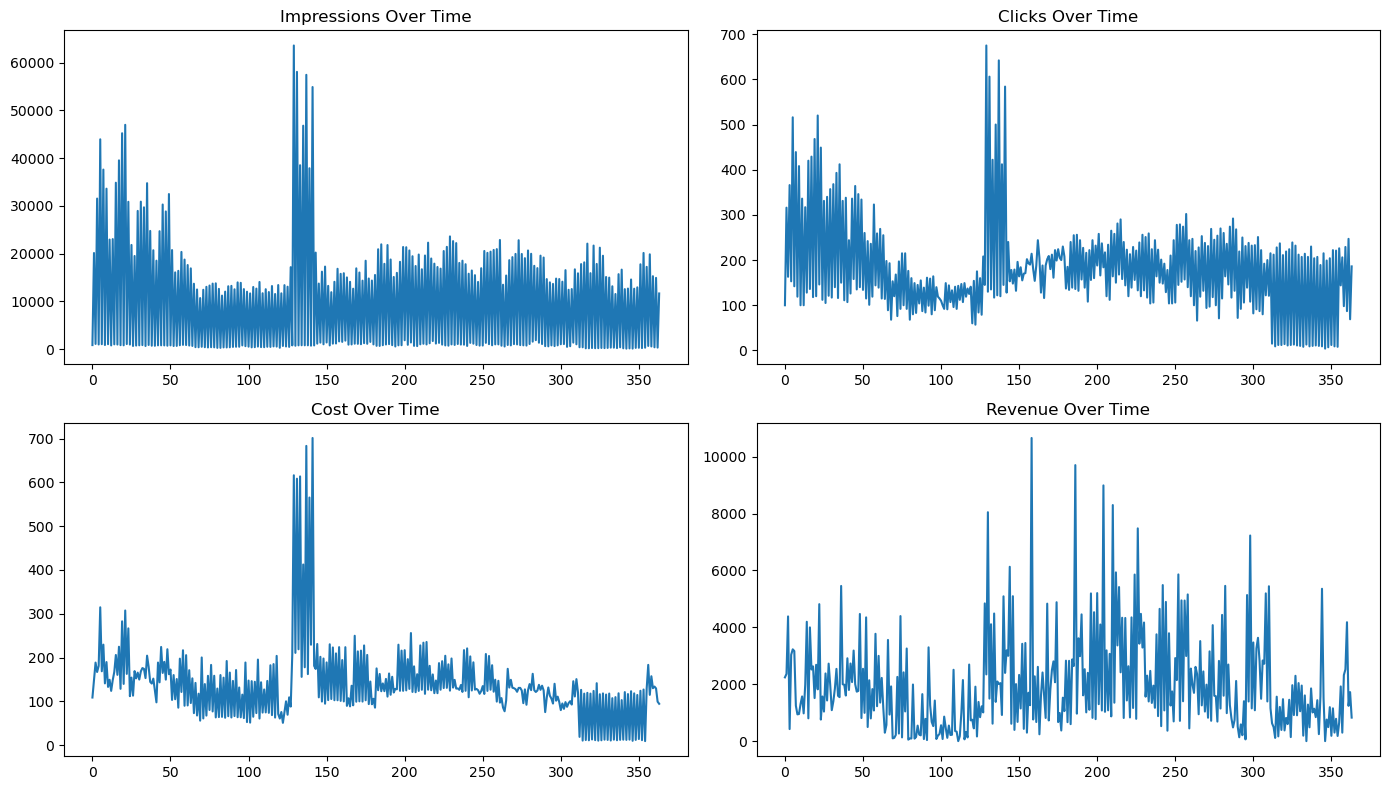

In [146]:
def plot_trends(df):
    plt.figure(figsize=(14, 8))
    plt.subplot(2, 2, 1)
    df['Impressions'].plot(title='Impressions Over Time')
    plt.subplot(2, 2, 2)
    df['Clicks'].plot(title='Clicks Over Time')
    plt.subplot(2, 2, 3)
    df['Cost'].plot(title='Cost Over Time')
    plt.subplot(2, 2, 4)
    df['Revenue'].plot(title='Revenue Over Time')
    plt.tight_layout()
    plt.show()

plot_trends(df)

In [147]:
aggregated_data = df.groupby(['Campaign type']).agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Cost': 'sum',
    'Conversions': 'sum',
    'Revenue': 'sum',


}).reset_index()


In [148]:
aggregated_data.describe()

,Impressions,Clicks,Cost,Conversions,Revenue
count,2.000000e+00,2.000000,2.000000,2.00000,2.000000
mean,1.855502e+06,32841.000000,25401.050000,2265.00000,361001.900000
std,2.430791e+06,17886.973137,1172.170911,742.46212,204867.502129
min,1.366730e+05,20193.000000,24572.200000,1740.00000,216138.700000
25%,9.960875e+05,26517.000000,24986.625000,2002.50000,288570.300000
50%,1.855502e+06,32841.000000,25401.050000,2265.00000,361001.900000
75%,2.714916e+06,39165.000000,25815.475000,2527.50000,433433.500000
max,3.574331e+06,45489.000000,26229.900000,2790.00000,505865.100000


In [149]:
aggregated_data.to_csv('microsoftbudget_data.csv', index=False)

In [150]:
df=pd.read_csv('metaads-performance.csv')

In [151]:
df['Date']=pd.to_datetime(df['Date'])

In [152]:
df.isnull().sum()

Date           0
Impressions    0
Reach          0
Cost           0
Clicks         0
Conversions    0
Revenue        0
dtype: int64

In [153]:
df.duplicated().sum()

0

In [154]:
df['ROI'] = (df['Revenue'] - df['Cost']) / df['Cost'] * 100

In [155]:
df['Profit']=df['Revenue']-df['Cost']

In [156]:
df.describe()


,Date,Impressions,Reach,Cost,Clicks,Conversions,Revenue,ROI,Profit
count,182,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,2024-03-31 12:00:00,19224.296703,11609.483516,119.944505,396.857143,15.604396,2900.750549,2548.977773,2780.806044
min,2024-01-01 00:00:00,6956.000000,4587.000000,22.300000,91.000000,0.000000,0.000000,-100.000000,-332.000000
25%,2024-02-15 06:00:00,13712.000000,7609.750000,95.575000,282.000000,8.000000,1316.675000,1017.773161,1199.475000
50%,2024-03-31 12:00:00,19003.000000,11449.000000,109.900000,362.000000,14.000000,2169.550000,2236.198617,2034.950000
75%,2024-05-15 18:00:00,23806.250000,15027.250000,126.900000,451.750000,20.000000,4076.625000,3601.616907,3968.900000
max,2024-06-30 00:00:00,43544.000000,25180.000000,332.000000,1374.000000,52.000000,9149.700000,12423.323171,8992.100000
std,NaN,7212.517890,4477.203274,54.150595,206.873708,10.520046,2337.057755,2020.695371,2328.031762


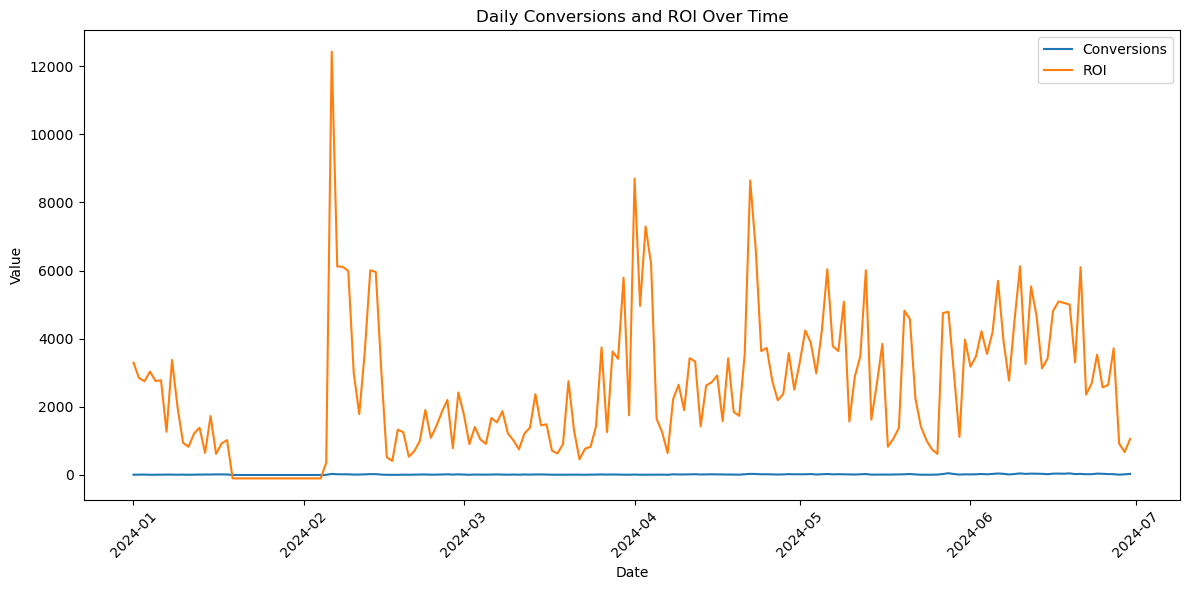

In [157]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Conversions'], label='Conversions')
plt.plot(df['Date'], df['ROI'], label='ROI')
plt.title('Daily Conversions and ROI Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

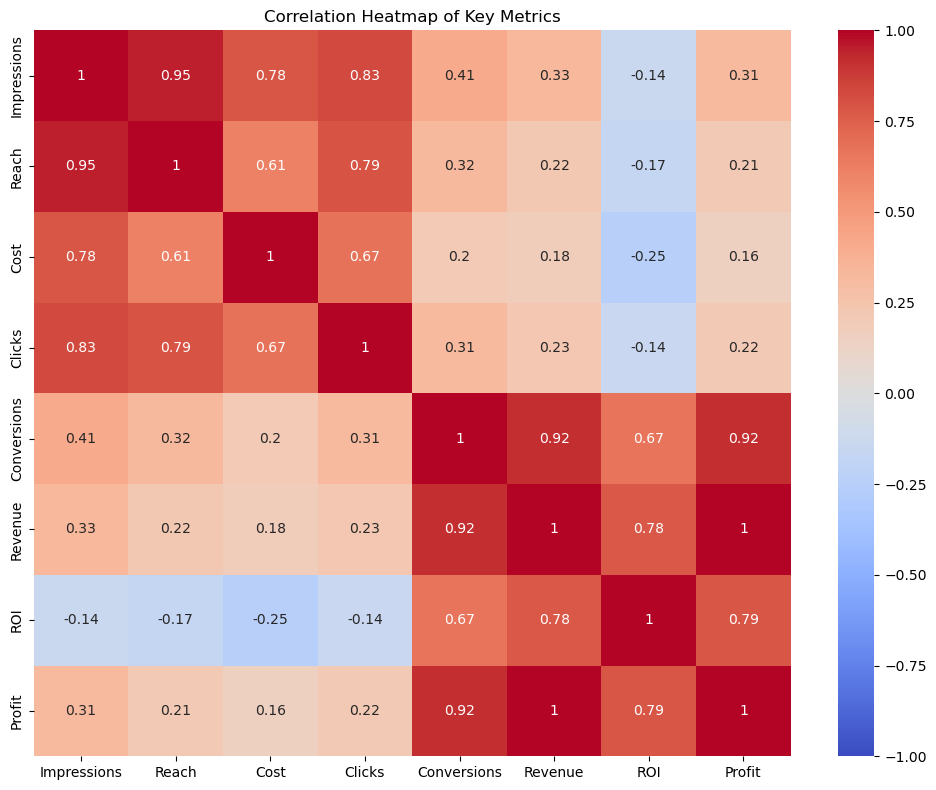

In [158]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Impressions', 'Reach', 'Cost', 'Clicks', 'Conversions', 'Revenue', 'ROI', 'Profit']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Key Metrics')
plt.tight_layout()
plt.show()

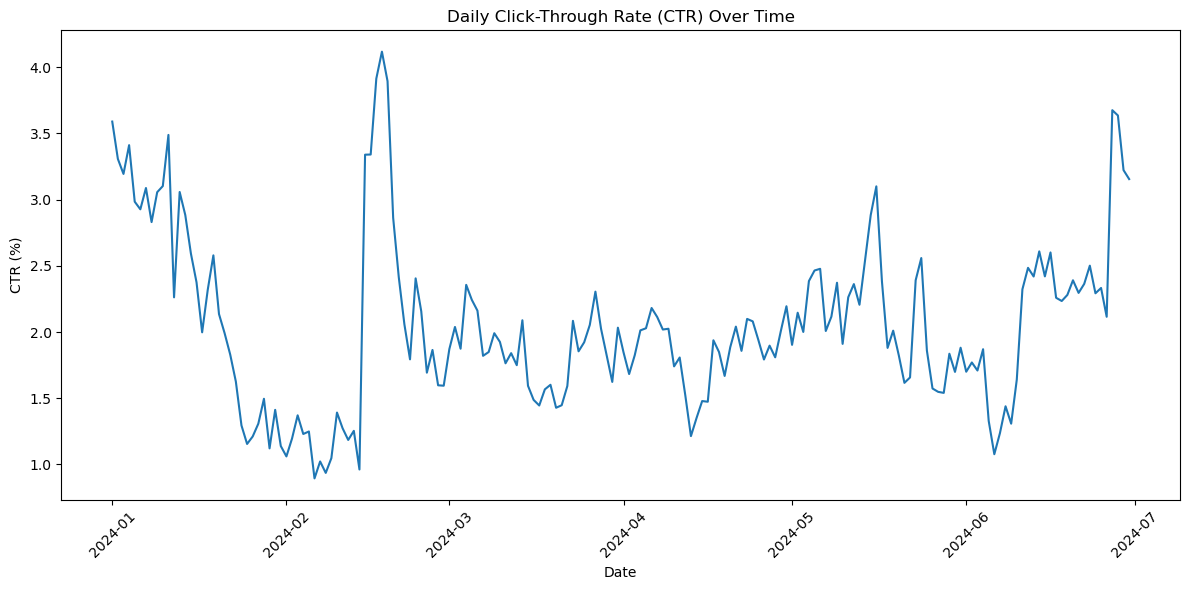

In [159]:
df['CTR'] = df['Clicks'] / df['Impressions'] * 100
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['CTR'])
plt.title('Daily Click-Through Rate (CTR) Over Time')
plt.xlabel('Date')
plt.ylabel('CTR (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

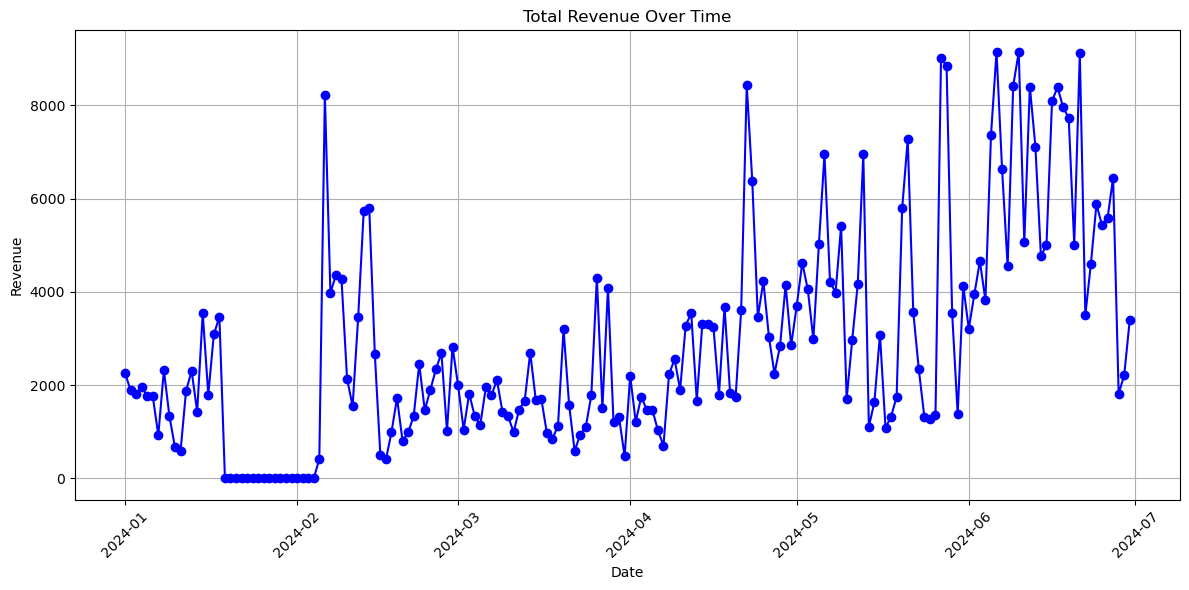

In [160]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Revenue'], marker='o', linestyle='-', color='b')
plt.title('Total Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [161]:
df

,Date,Impressions,Reach,Cost,Clicks,Conversions,Revenue,ROI,Profit,CTR
0,2024-01-01,11560.0,7851.0,66.5,415.0,8.0,2258.3,3295.939850,2191.8,3.589965
1,2024-01-02,9674.0,6278.0,64.3,320.0,11.0,1894.2,2845.878694,1829.9,3.307835
2,2024-01-03,8640.0,5414.0,63.4,276.0,12.0,1808.1,2751.892744,1744.7,3.194444
3,2024-01-04,9057.0,5798.0,62.6,309.0,6.0,1962.0,3034.185304,1899.4,3.411726
4,2024-01-05,9448.0,6120.0,61.7,282.0,8.0,1763.5,2758.184765,1701.8,2.984759
...,...,...,...,...,...,...,...,...,...,...
177,2024-06-26,34980.0,20076.0,203.4,740.0,26.0,5582.2,2644.444444,5378.8,2.115495
178,2024-06-27,26524.0,17136.0,169.0,975.0,24.0,6443.4,3712.662722,6274.4,3.675916
179,2024-06-28,29264.0,18940.0,177.3,1064.0,8.0,1811.3,921.601805,1634.0,3.635867
180,2024-06-29,39216.0,22878.0,286.6,1264.0,19.0,2215.6,673.063503,1929.0,3.223174


In [162]:
df['month']=df['Date'].dt.month
monthly_data = df.groupby('month').agg({
    'Impressions': 'sum',
    'Reach': 'sum',
    'Cost': 'sum',
    'Clicks': 'sum',
    'Conversions': 'sum',
    'Revenue': 'sum',

}).reset_index()

In [163]:
monthly_data

,month,Impressions,Reach,Cost,Clicks,Conversions,Revenue
0,1,522785.0,289230.0,4513.8,11894.0,202.0,34772.2
1,2,459739.0,287177.0,2840.4,8937.0,344.0,63969.2
2,3,625448.0,420403.0,3213.0,11614.0,330.0,51166.9
3,4,477103.0,302562.0,2719.1,8667.0,486.0,85121.9
4,5,556416.0,325003.0,3674.8,11411.0,579.0,116520.1
5,6,857331.0,488551.0,4868.8,19705.0,899.0,176386.3


In [164]:
aggregated_data = monthly_data.groupby(['month']).agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Cost': 'sum',
    'Conversions': 'sum',
    'Revenue': 'sum',


}).reset_index()

In [165]:
monthly_data.drop(columns=['month'])

,Impressions,Reach,Cost,Clicks,Conversions,Revenue
0,522785.0,289230.0,4513.8,11894.0,202.0,34772.2
1,459739.0,287177.0,2840.4,8937.0,344.0,63969.2
2,625448.0,420403.0,3213.0,11614.0,330.0,51166.9
3,477103.0,302562.0,2719.1,8667.0,486.0,85121.9
4,556416.0,325003.0,3674.8,11411.0,579.0,116520.1
5,857331.0,488551.0,4868.8,19705.0,899.0,176386.3


In [166]:
aggregated_data = monthly_data.agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Cost': 'sum',
    'Conversions': 'sum',
    'Revenue': 'sum',


}).reset_index()

In [167]:
print(aggregated_data)

         index          0
0  Impressions  3498822.0
1       Clicks    72228.0
2         Cost    21829.9
3  Conversions     2840.0
4      Revenue   527936.6


In [168]:
df=pd.read_csv('unified_ecommerce_data.csv')

In [169]:
df

,Channel,Campaign_Type,Impressions,Clicks,Cost,Conversions,Revenue,Profit,Conversion_Rate,ROI
0,Google,Cross-network,37580588,441745,343674.0,23165.9,3166297.3,2822623.3,6.740661,8.213084
1,Google,Display Network,353827,11865,2951.7,108.1,18460.4,15508.7,3.662296,5.254159
2,Google,Search Network,1385843,149630,149558.8,12464.0,2330129.0,2180570.2,8.333846,14.580019
3,Microsoft,Search & content,136673,20193,26229.9,2790.0,505865.1,479635.2,10.636716,18.285819
4,Microsoft,Shopping,3574331,45489,24572.2,1740.0,216138.7,191566.5,7.081173,7.796066
5,Meta,Unknown,3498822,72228,21829.9,2840.0,527936.6,506106.7,8.616462,23.184100


In [180]:
df.loc[df['Campaign_Type'].str.startswith('Unknown'), 'Campaign_Type'] = 'Meta'

In [184]:
df.to_csv('unified_ecommerce_data.csv', index=False)
df

,Channel,Campaign_Type,Impressions,Clicks,Cost,Conversions,Revenue,Profit,Conversion_Rate,ROI
0,Google,Cross-network,37580588,441745,343674.0,23165.9,3166297.3,2822623.3,6.740661,8.213084
1,Google,Display Network,353827,11865,2951.7,108.1,18460.4,15508.7,3.662296,5.254159
2,Google,Search Network,1385843,149630,149558.8,12464.0,2330129.0,2180570.2,8.333846,14.580019
3,Microsoft,Search & content,136673,20193,26229.9,2790.0,505865.1,479635.2,10.636716,18.285819
4,Microsoft,Shopping,3574331,45489,24572.2,1740.0,216138.7,191566.5,7.081173,7.796066
5,Meta,Meta,3498822,72228,21829.9,2840.0,527936.6,506106.7,8.616462,23.184100


In [186]:
# Read the campaign performance data
campaign_data = pd.read_csv('unified_ecommerce_data.csv')

# Read the credit scores data
credit_scores = pd.read_csv('campaign_credit_scores.csv')

campaign_data['Campaign_Type'] = campaign_data['Campaign_Type'].str.lower()
credit_scores['Campaign Type'] = credit_scores['Campaign Type'].str.lower()

merged_data = pd.merge(campaign_data, credit_scores, 
                       left_on='Campaign_Type', 
                       right_on='Campaign Type', 
                       how='left')

merged_data = merged_data.drop(columns=['Campaign Type'])
merged_data['Campaign_Type'] = merged_data['Campaign_Type'].str.title()

# Save the merged data to a new CSV file
output_file = 'campaign_performance_with_credit_scores.csv'
merged_data.to_csv(output_file, index=False)

print(f"Merged data with credit scores has been saved to {output_file}")

Merged data with credit scores has been saved to campaign_performance_with_credit_scores.csv


In [188]:
df

,Channel,Campaign_Type,Impressions,Clicks,Cost,Conversions,Revenue,Profit,Conversion_Rate,ROI,Credit Score,CPC,CVR
0,Google,Cross-Network,37580588,441745,343674.0,23165.9,3166297.3,2822623.3,6.740661,8.213084,0.586954,0.777992,0.052442
1,Google,Display Network,353827,11865,2951.7,108.1,18460.4,15508.7,3.662296,5.254159,0.015933,0.248774,0.009111
2,Google,Search Network,1385843,149630,149558.8,12464.0,2330129.0,2180570.2,8.333846,14.580019,0.199782,0.999524,0.083299
3,Microsoft,Search & Content,136673,20193,26229.9,2790.0,505865.1,479635.2,10.636716,18.285819,0.027488,1.298960,0.138167
4,Microsoft,Shopping,3574331,45489,24572.2,1740.0,216138.7,191566.5,7.081173,7.796066,0.061575,0.540179,0.038251
5,Meta,Meta,3498822,72228,21829.9,2840.0,527936.6,506106.7,8.616462,23.184100,0.108268,0.302236,0.039320


In [189]:
import numpy as np
import pandas as pd

# Load data with credit score
df = pd.read_csv('campaign_performance_with_credit_scores.csv')

# Calculate additional metrics (CPC, CVR, etc.)
df['CPC'] = df['Cost'] / df['Clicks']
df['CVR'] = df['Conversions'] / df['Clicks']

# Define Monte Carlo allocation function incorporating credit score
def monte_carlo_allocation_with_credit(data, total_budget, num_simulations=10000):
    num_channels = len(data)
    best_allocation = None
    best_roi = -np.inf

    for _ in range(num_simulations):
        allocation = np.random.dirichlet(np.ones(num_channels)) * total_budget

        # Ensure that no channel receives less than 10% of the total budget
        while np.any(allocation < 0.1 * total_budget):
            allocation = np.random.dirichlet(np.ones(num_channels)) * total_budget

        # Simulate clicks based on the allocated budget
        simulated_clicks = allocation / data['CPC'].values

        # Use credit score to modify conversion estimates
        simulated_conversions = simulated_clicks * (data['CVR'].values * data['Credit Score'].values)
        
        total_conversions = np.sum(simulated_conversions)
        total_cost = np.sum(allocation)

        # Calculate estimated revenue and profit
        avg_revenue_per_conversion = data['Revenue'].sum() / data['Conversions'].sum()
        simulated_revenue = simulated_conversions * avg_revenue_per_conversion
        total_revenue = np.sum(simulated_revenue)
        total_profit = total_revenue - total_cost

        # Calculate ROI
        roi = (total_profit / total_cost) * 100

        # Store the best allocation based on ROI
        if roi > best_roi:
            best_roi = roi
            best_allocation = allocation

    return best_allocation, best_roi

# Set the total budget
total_budget = 200000

# Run Monte Carlo optimization with credit score
best_allocation, best_roi = monte_carlo_allocation_with_credit(df, total_budget)

# Update dataframe with the results
df['Allocated_Budget'] = best_allocation
df['Estimated_Clicks'] = df['Allocated_Budget'] / df['CPC']
df['Estimated_Conversions'] = df['Estimated_Clicks'] * df['CVR'] * df['Credit Score']
avg_revenue_per_conversion = df['Revenue'].sum() / df['Conversions'].sum()
df['Estimated_Revenue'] = df['Estimated_Conversions'] * avg_revenue_per_conversion
df['Estimated_Profit'] = df['Estimated_Revenue'] - df['Allocated_Budget']
df['Estimated_ROI'] = (df['Estimated_Profit'] / df['Allocated_Budget']) * 100

# Print results
print("Optimized Budget Allocation with Credit Score:")
print(df[['Channel', 'Campaign_Type', 'Allocated_Budget', 'Estimated_Conversions', 'Estimated_Profit', 'Estimated_ROI']])
print(f"\nTotal Budget Allocated: ${df['Allocated_Budget'].sum():.2f}")
print(f"Total Estimated Conversions: {df['Estimated_Conversions'].sum():.2f}")
print(f"Total Estimated ROI: {df['Estimated_ROI'].mean():.2f}%")



Optimized Budget Allocation with Credit Score:
     Channel     Campaign_Type  Allocated_Budget  Estimated_Conversions  \
0     Google     Cross-Network      87808.607003            3474.110072   
1     Google   Display Network      20699.138194              12.078029   
2     Google    Search Network      23679.185466             394.247789   
3  Microsoft  Search & Content      21505.303410              62.877117   
4  Microsoft          Shopping      22172.723252              96.678252   
5       Meta              Meta      24135.042675             339.950646   

   Estimated_Profit  Estimated_ROI  
0     457374.513602     520.876631  
1     -18803.764230     -90.843223  
2      38189.101831     161.277092  
3     -11638.159791     -54.117627  
4      -7001.254871     -31.575981  
5      29212.534154     121.037839  

Total Budget Allocated: $200000.00
Total Estimated Conversions: 4379.94
Total Estimated ROI: 104.44%


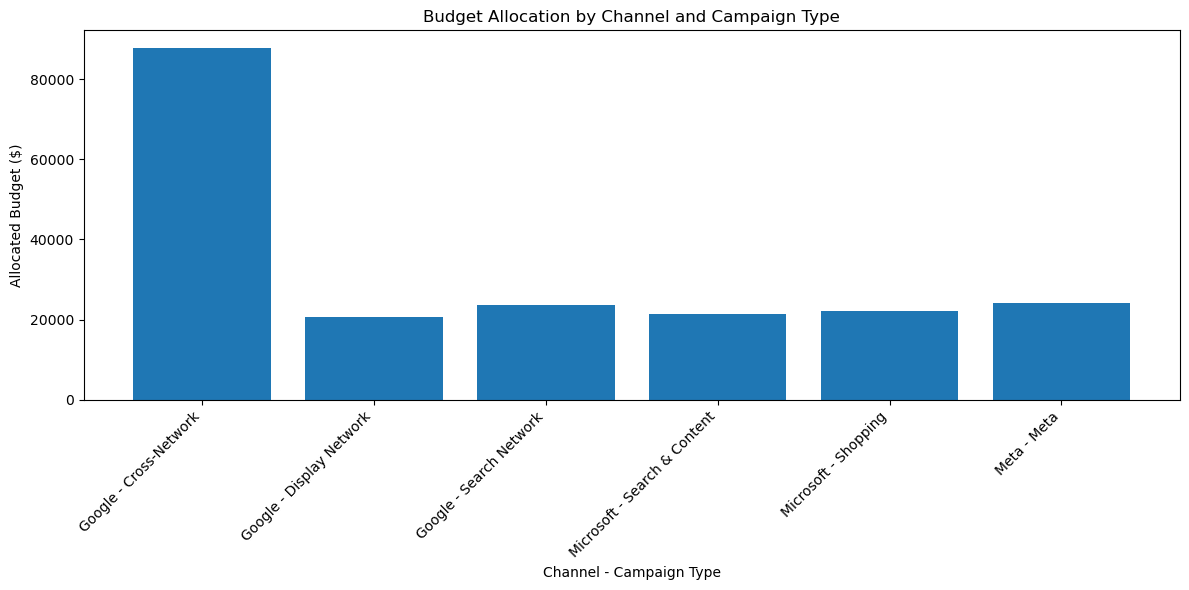

In [190]:
plt.figure(figsize=(12, 6))
plt.bar(df['Channel'] + ' - ' + df['Campaign_Type'], df['Allocated_Budget'])
plt.title('Budget Allocation by Channel and Campaign Type')
plt.xlabel('Channel - Campaign Type')
plt.ylabel('Allocated Budget ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#  First Submission Results

# not normalised , website landing data not utilised
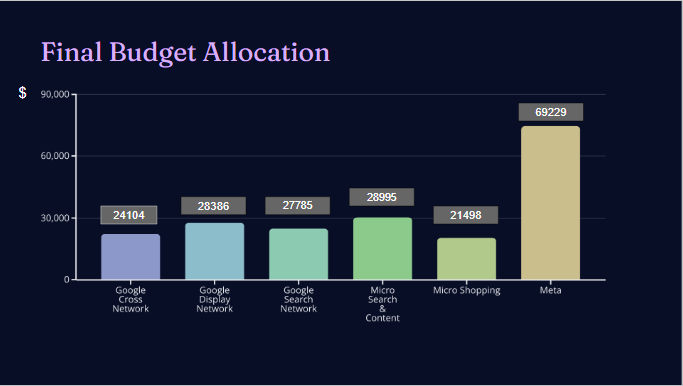

# Final Submission Results
 ## Normalised the data
 ## Used Website Landing Data to create New feature`Credit Score` to improve model 
 
   ### Google Cross-Network    :87808.607003 
   ### **Google Display Network** :20699.138194
   ### **Google Search Network**  :23679.185466
   ### **Microsoft Shopping**     :21505.303410
   ### **Microsoft Search & Content** :22172.723252
   ### **Meta (without specific campaign types)** :24135.042675  
   
   #### Total Budget Allocated: 200000
   #### Total Estimated Conversions: 4379.94
   #### Total Estimated ROI: 104.44%
 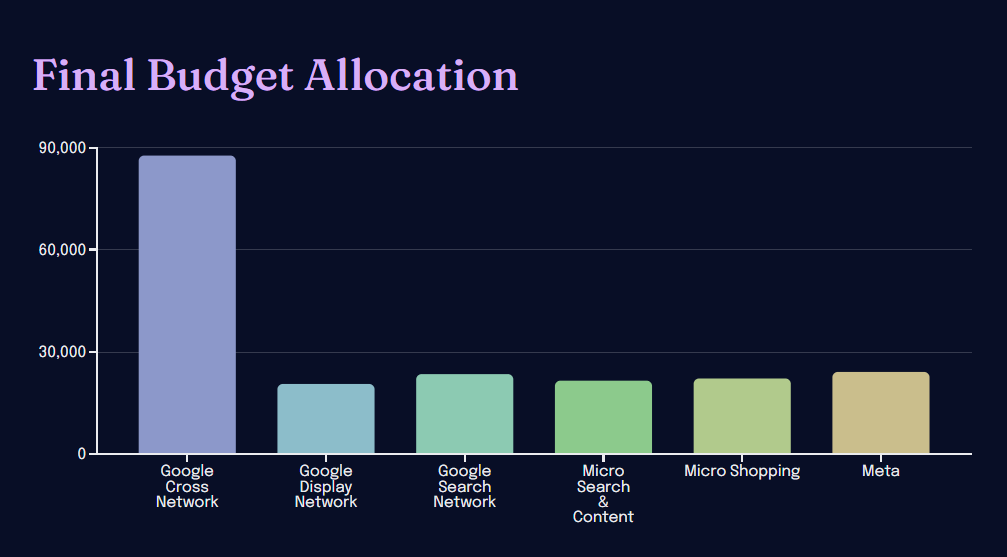